# Project 4: Predictive Analysis Using Scikit-Learn and Using the Mushroom Dataset #

## Introduction: ##

Mushrooms are widely known as additional ingredients or as topping to some of the food that we are eating. It also takes the form of "meat" for some people who are vegetarians or vegans and also adds good flavor to the food we eat. However, we have to be really careful when it comes to eating mushrooms as some or maybe even most of it are not edible. Mushrooms have different characteristics that you need to look at closely in order to determine whether it is edible or not. The goal of this project is to look at some of these characteristics to find out which among them are good predictors of whether the mushroom is edible or not.

### The Dataset: ###

The dataset came from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/mushroom). The dataset contains hypothetical samples of 23 species of gilled mushrooms in the Agaricus and Lepiota family. It has a total of 8124 records and 23 attributes (including the response variable which tells whether the mushroom is edible or not). The rest of the 22 attributes are all categorical variables which describes the characteristics of each of the mushroom. These are: cap shape, cap surface, cap color, bruises, odor, gill attachment, gill spacing, gill size, gill color, stalk shape, stalk root, stalk surface above ring, stalk surface below ring, stalk color above ring, stalk color below ring, veil type, veil color, ring number, ring type, spore print color, population, and habitat.

### The Problem: ###

For this project, the task is to use predictive analysis and scikit-learn to find out which other attribute or attributes would best predict whether a particular mushroom is edible or not.

## Phase 1:Data Acquisition, Data Preparation & Exploratory Data Analysis ##

### Initialization Steps: ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### A. Data Acquisition & Preparation: ###

**Steps:**
1. Read the mushroom dataset from the original data source and change into a pandas data frame.
2. Create a subset of the data frame which includes column indicating whether mushroom is edible or poisonous, column for odor, and at least two other columns of our choice. Please note that the columns will be identified below with the rationale of why we are using these columns.
3. Add meaningful names to the columns.
4. Determine if there are null values and also whether the columns contain other values not described on the data dictionary.
5. Replace column values to also have meaningful names and so that it will be easier to understand for exploratory data analysis.

In [2]:
#reads data from the original source
mushroom = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header = None)
mushroom.head() #prints a sample of the data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Attribute Choices and Rationale:** Aside from odor, the other two attributes that we will be using as predictor columns are: Cap color and Population. Based on experience and after doing some research, we believe that these two attributes are good predictors of whether the mushroom is edible or not. We think that the cap color is a good predictor of whether a mushroom is edible or not because as we have experienced and seen, we usually eat mushrooms that are brown and white in color. Thus, we are thinking that mushrooms that have this cap color are edible. With regards to population, we also think that this is a good predictor of whether the mushroom is edible or poisonous because we think that the more common the mushroom the is, it is going to be edible, otherwise, it is poisonous.

In [3]:
#creates a subset of the copy of the original dataset
#gets only the relevant columns, i.e., edible/poisonous column, cap color, odor, and population
sub_mr = mushroom.iloc[:,[0,3,5,21]].copy() 
sub_mr.head()

,0,3,5,21
0,p,n,p,s
1,e,y,a,n
2,e,w,l,n
3,p,w,p,s
4,e,g,n,a


In [4]:
sub_mr.columns = ['IsEdible', 'Cap_Color', 'Odor', 'Population'] #create meaningful column names
sub_mr.head()

,IsEdible,Cap_Color,Odor,Population
0,p,n,p,s
1,e,y,a,n
2,e,w,l,n
3,p,w,p,s
4,e,g,n,a


**Determine if there are nulls and whether columns contain values not described in data dictionary:**

In [5]:
sub_mr.info() #check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 4 columns):
IsEdible      8124 non-null object
Cap_Color     8124 non-null object
Odor          8124 non-null object
Population    8124 non-null object
dtypes: object(4)
memory usage: 254.0+ KB


**Result:** Based on the results above, the columns do not contain any null values. This is because there are 8124 records and the results say that there are 8124 non-null object for all the columns selected for the study.

**Checking for column values not found in the data dictionary:**

In [6]:
sub_mr.IsEdible.unique() #checks if there are values other than 'e' or 'p'

array(['p', 'e'], dtype=object)

Based on the results above, the column does not contain any values other than 'e' or 'p'.

In [7]:
sub_mr.Cap_Color.unique() #checks if there are values other than those described in data dictionary for cap color

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

Based on data dictionary, the following are the expected values for this column: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y. From the results above, we can see that the cap color column only contains 10 unique values as defined on the data dictionary.

In [8]:
sub_mr.Odor.unique() #checks if there values other than those described in data dictionary for odor

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

Based on data dictionary, the following are the expected values for this column: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s. From the results above, we can see that the odor column only contains 9 unique values as defined on the data dictionary.

In [9]:
sub_mr.Population.unique() #checks if there values other than those described in data dictionary for population

array(['s', 'n', 'a', 'v', 'y', 'c'], dtype=object)

Based on data dictionary, the following are the expected values for this column: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y. From the results above, we can see that the odor column only contains 6 unique values as defined on the data dictionary.

**Replace column values to be more meaningful and understandable for EDA purposes:**

In [10]:
#replace column values to edible for 'e' and poisonous for 'p'
sub_mr.IsEdible.replace('e', 'edible', inplace = True)
sub_mr.IsEdible.replace('p', 'poisonous', inplace = True)
sub_mr.head()

,IsEdible,Cap_Color,Odor,Population
0,poisonous,n,p,s
1,edible,y,a,n
2,edible,w,l,n
3,poisonous,w,p,s
4,edible,g,n,a


In [11]:
#replace column values for Cap_Color
sub_mr.Cap_Color.replace({'n': 'brown', 
                          'b': 'buff',
                          'c': 'cinnamon',
                          'g': 'gray',
                          'r': 'green',
                          'p': 'pink',
                          'u': 'purple',
                          'e': 'red',
                          'w': 'white',
                          'y': 'yellow'}, inplace = True)
sub_mr.head()

,IsEdible,Cap_Color,Odor,Population
0,poisonous,brown,p,s
1,edible,yellow,a,n
2,edible,white,l,n
3,poisonous,white,p,s
4,edible,gray,n,a


In [12]:
#replace column values for Odor
sub_mr.Odor.replace({'a': 'almond', 
                     'l': 'anise',
                     'c': 'creosote',
                     'y': 'fishy',
                     'f': 'foul',
                     'm': 'musty',
                     'n': 'none',
                     'p': 'pungent',
                     's': 'spicy'}, inplace = True)
sub_mr.head()

,IsEdible,Cap_Color,Odor,Population
0,poisonous,brown,pungent,s
1,edible,yellow,almond,n
2,edible,white,anise,n
3,poisonous,white,pungent,s
4,edible,gray,none,a


In [13]:
#replace column values for population
sub_mr.Population.replace({'a': 'abundant', 
                           'c': 'clustered',
                           'n': 'numerous',
                           's': 'scattered',
                           'v':'several',
                           'y':'solitary'}, inplace = True)
sub_mr.head()

,IsEdible,Cap_Color,Odor,Population
0,poisonous,brown,pungent,scattered
1,edible,yellow,almond,numerous
2,edible,white,anise,numerous
3,poisonous,white,pungent,scattered
4,edible,gray,none,abundant


### B. Exploratory Data Analysis: ###

**Steps:**
1. Create 3 dataframes to group dataset using each of the predictor variables that will be used for the model, i.e., cap color, odor, and population.
2. Create visualizations to show the distribution of the columns included in the analysis. These are IsEdible, cap color, odor, and population.
3. Analyze whether the predictor variables identified are helpful in determining whether a mushroom is edible or not using visualizations.

In [14]:
mr_grp_edible = sub_mr.groupby(['IsEdible']).size().to_frame('Count') #counts distribution of mushrooms (edible or not?)
mr_grp_edible

,Count
IsEdible,
edible,4208
poisonous,3916


In [15]:
mr_grp_capcol = sub_mr.groupby(['Cap_Color']).size().to_frame('Count') #counts mushrooms by cap_color
mr_grp_capcol.sort_values(by='Count',ascending=False,inplace=True)
mr_grp_capcol

,Count
Cap_Color,
brown,2284
gray,1840
red,1500
yellow,1072
white,1040
buff,168
pink,144
cinnamon,44
green,16


In [16]:
mr_grp_odor = sub_mr.groupby(['Odor']).size().to_frame('Count') #counts mushrooms by odor
mr_grp_odor.sort_values(by='Count',ascending=False,inplace=True)
mr_grp_odor

,Count
Odor,
none,3528
foul,2160
fishy,576
spicy,576
almond,400
anise,400
pungent,256
creosote,192
musty,36


In [17]:
mr_grp_pop = sub_mr.groupby(['Population']).size().to_frame('Count') #counts mushrooms by population
mr_grp_pop.sort_values(by='Count',ascending=False,inplace=True)
mr_grp_pop

,Count
Population,
several,4040
solitary,1712
scattered,1248
numerous,400
abundant,384
clustered,340


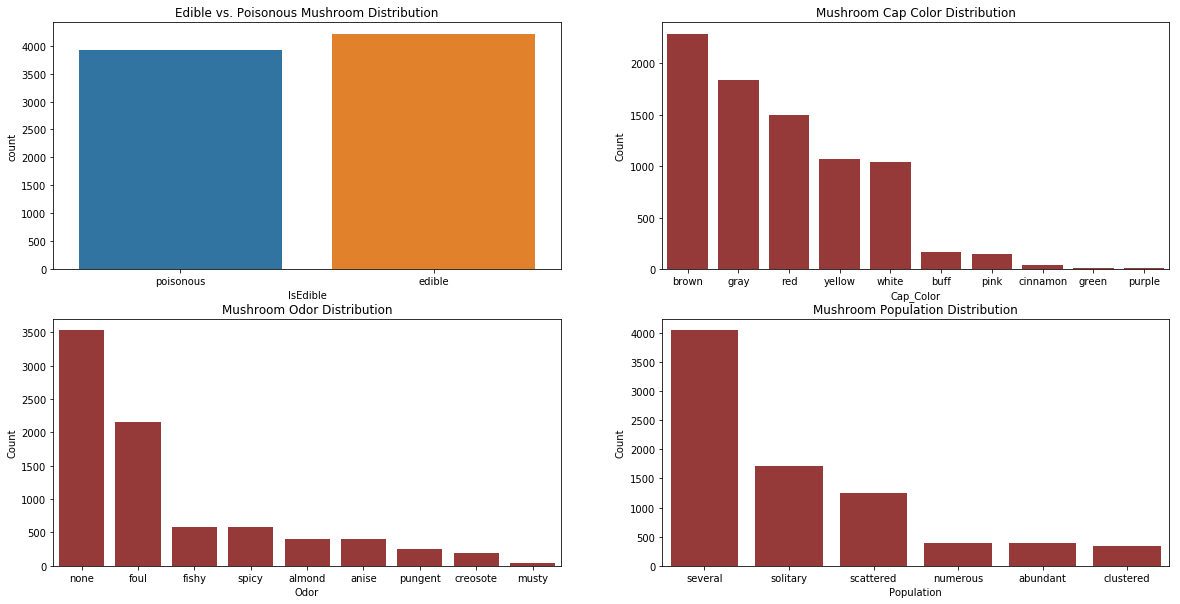

In [18]:
# define a new figure for plotting
plt.figure(figsize=(20,10))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(221)
sns.countplot(x='IsEdible',data=sub_mr); #plots distribution of whether mushroom is edible or not

# give the plot a title
plt.title('Edible vs. Poisonous Mushroom Distribution')

#subplot that will appear on the righthand side of our 2x2
# subplot ('122' = 1x2, position 2)
plt.subplot(222)
sns.barplot(x=mr_grp_capcol.index,y='Count',data=mr_grp_capcol,color='brown'); #plots distribution of mushroom by cap color

# give the plot a title
plt.title('Mushroom Cap Color Distribution');

#subplot that will appear on the 2nd row of the lefthand side of our 2x2
plt.subplot(223)
sns.barplot(x=mr_grp_odor.index,y='Count',data=mr_grp_odor,color='brown'); #plots distribution of mushroom by odor

# give the plot a title
plt.title('Mushroom Odor Distribution');

#subplot that will appear on the 2nd row of the lefthand side of our 2x2
plt.subplot(224)
sns.barplot(x=mr_grp_pop.index,y='Count',data=mr_grp_pop,color='brown'); #plots distribution of mushroom by population

# give the plot a title
plt.title('Mushroom Population Distribution');

**Findings:**
1. Edible vs. Poisonous Mushroom Chart: The bar chart shows that majority (more than 50% or approximately 52%) of the dataset includes edible mushrooms.
2. Mushroom Cap Color Chart: The bar chart shows that the most common color of the mushroom found in this dataset is brown while the least common ones are green and purple in color.
3. Mushroom Odor Chart: The bar chart shows that most mushrooms does not have any smell. The dataset also contains mushrooms with foul odor while the least common odor for the mushrooms found in this dataset is musty.
4. Mushroom Population Chart: This bar chart shows that most of the mushrooms contained in this dataset has population that can be categorized as "several". Mushroom population having "numerous", "abundant", and "clustered" categories are the least common ones.

In [19]:
#create a dataframe to calculate count of mushrooms by IsEdible and Cap Color
mr_grp_edible_capcol = sub_mr.groupby(['IsEdible','Cap_Color'],as_index=False)['Odor'].count()
mr_grp_edible_capcol.rename(columns={'Odor':'Count'},inplace=True)
mr_grp_edible_capcol

,IsEdible,Cap_Color,Count
0,edible,brown,1264
1,edible,buff,48
2,edible,cinnamon,32
3,edible,gray,1032
4,edible,green,16
5,edible,pink,56
6,edible,purple,16
7,edible,red,624
8,edible,white,720
9,edible,yellow,400


In [20]:
#creates dataframe to merge total count of mushrooms by IsEdible or not and cap color by edible or not
pct_edible_capcol = pd.merge(mr_grp_edible_capcol,mr_grp_capcol,on=['Cap_Color'],how='outer', suffixes=('_edible_capcol','_total'))
pct_edible_capcol

,IsEdible,Cap_Color,Count_edible_capcol,Count_total
0,edible,brown,1264,2284
1,poisonous,brown,1020,2284
2,edible,buff,48,168
3,poisonous,buff,120,168
4,edible,cinnamon,32,44
5,poisonous,cinnamon,12,44
6,edible,gray,1032,1840
7,poisonous,gray,808,1840
8,edible,green,16,16
9,edible,pink,56,144


In [21]:
#creates column Percent to calculate percentage of mushrooms by cap color and by IsEdible
pct_edible_capcol['Percent'] = (pct_edible_capcol['Count_edible_capcol']/pct_edible_capcol['Count_total']) * 100
pct_edible_capcol

,IsEdible,Cap_Color,Count_edible_capcol,Count_total,Percent
0,edible,brown,1264,2284,55.341506
1,poisonous,brown,1020,2284,44.658494
2,edible,buff,48,168,28.571429
3,poisonous,buff,120,168,71.428571
4,edible,cinnamon,32,44,72.727273
5,poisonous,cinnamon,12,44,27.272727
6,edible,gray,1032,1840,56.086957
7,poisonous,gray,808,1840,43.913043
8,edible,green,16,16,100.000000
9,edible,pink,56,144,38.888889


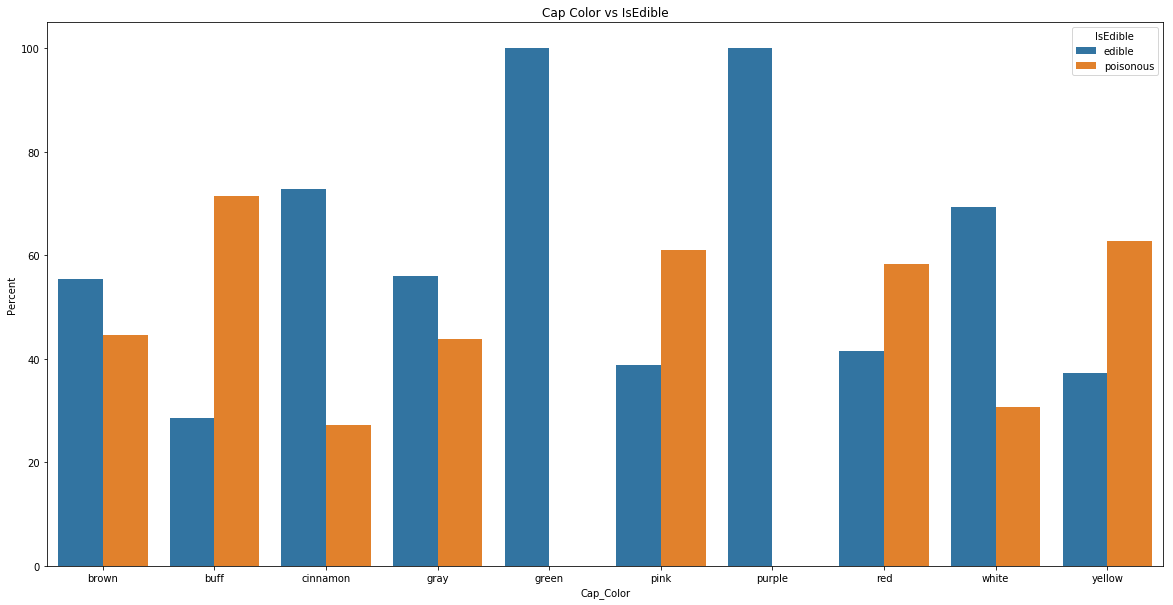

In [31]:
# define a new figure for plotting
plt.figure(figsize=(20,10))

#plots mushroom dataset by cap color and whether it is edible or not using the percentages
sns.barplot(x='Cap_Color',y='Percent',hue='IsEdible',data=pct_edible_capcol);

# give the plot a title
plt.title('Cap Color vs IsEdible');

**Findings:** Based on the chart above, it seems that mushroom's cap color is not a good predictor of whether the mushroom is edible or not. This is because as shown in the cap color distribution chart above, brown is the most common color for the mushrooms however, it seems that it will be very difficult to predict whether the mushroom is edible or not based on this because there is approximately a 45% chance that a brown mushroom is poisonous and the same goes with gray cap colored mushrooms which is the second highest color included in this data set. However, it can still be useful for some cap colors such as white (mostly edible), yellow and red (both mostly poisonous). It is also interesting to know that green and purple (although they do not have a large amount of records) are edible.

In [32]:
#create a dataframe to calculate count of mushrooms by IsEdible and Odor
mr_grp_edible_odor = sub_mr.groupby(['IsEdible','Odor'],as_index=False)['Cap_Color'].count()
mr_grp_edible_odor.rename(columns={'Cap_Color':'Count'},inplace=True)
mr_grp_edible_odor

,IsEdible,Odor,Count
0,edible,almond,400
1,edible,anise,400
2,edible,none,3408
3,poisonous,creosote,192
4,poisonous,fishy,576
5,poisonous,foul,2160
6,poisonous,musty,36
7,poisonous,none,120
8,poisonous,pungent,256
9,poisonous,spicy,576


In [33]:
#creates dataframe to merge total count of mushrooms by IsEdible or not and odor by edible or not
pct_edible_odor = pd.merge(mr_grp_edible_odor,mr_grp_odor,on=['Odor'],how='outer', suffixes=('_edible_odor','_total'))
pct_edible_odor

,IsEdible,Odor,Count_edible_odor,Count_total
0,edible,almond,400,400
1,edible,anise,400,400
2,edible,none,3408,3528
3,poisonous,none,120,3528
4,poisonous,creosote,192,192
5,poisonous,fishy,576,576
6,poisonous,foul,2160,2160
7,poisonous,musty,36,36
8,poisonous,pungent,256,256
9,poisonous,spicy,576,576


In [34]:
#creates column Percent to calculate percentage of mushrooms by odor and by IsEdible
pct_edible_odor['Percent'] = (pct_edible_odor['Count_edible_odor']/pct_edible_odor['Count_total']) * 100
pct_edible_odor

,IsEdible,Odor,Count_edible_odor,Count_total,Percent
0,edible,almond,400,400,100.000000
1,edible,anise,400,400,100.000000
2,edible,none,3408,3528,96.598639
3,poisonous,none,120,3528,3.401361
4,poisonous,creosote,192,192,100.000000
5,poisonous,fishy,576,576,100.000000
6,poisonous,foul,2160,2160,100.000000
7,poisonous,musty,36,36,100.000000
8,poisonous,pungent,256,256,100.000000
9,poisonous,spicy,576,576,100.000000


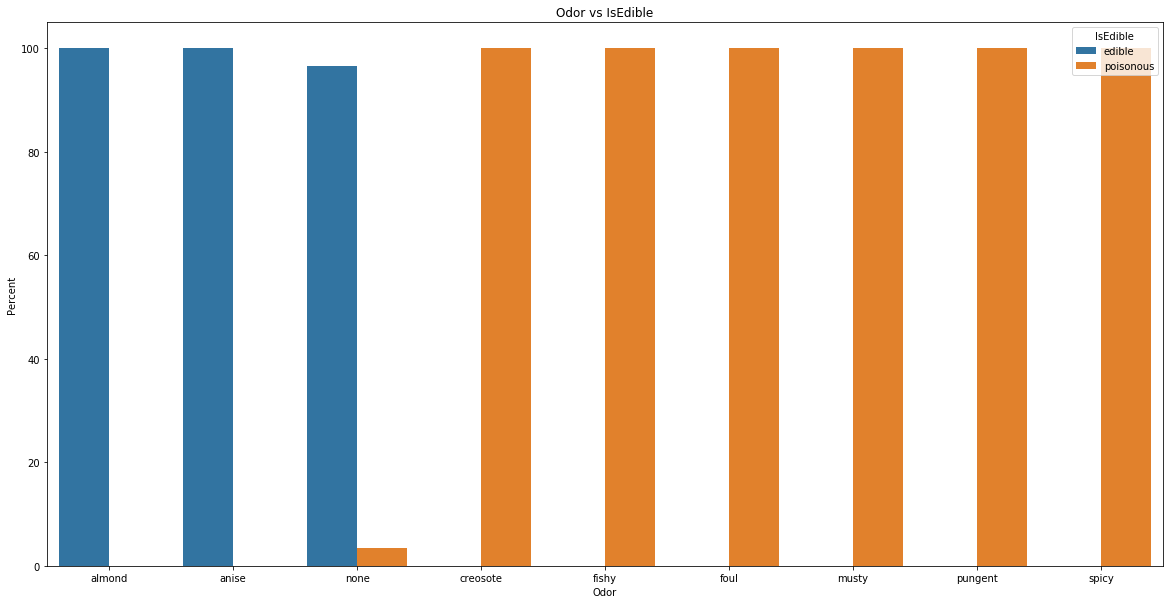

In [35]:
# define a new figure for plotting
plt.figure(figsize=(20,10))

#plots mushroom dataset by odor and whether it is edible or not using the percentages
sns.barplot(x='Odor',y='Percent',hue='IsEdible',data=pct_edible_odor);

# give the plot a title
plt.title('Odor vs IsEdible');

**Findings:** Based on the chart above, it seems that mushroom's odor is a very good predictor of whether the mushroom is edible or not. This is because as shown above, the almond and anise smells are very likely (in this dataset 100%) to be edible while the smells creosote, fishy, foul, musty, pungent, and spicy all are very likely to be poisonous (also 100% for this dataset). The mushroom odor distribution chart above showed that most of the mushrooms in the dataset does not have any smell. Although, there are a few mushrooms in this category that are poisonous, the chance of it having no smell and being poisonous is very unlikely (3.40%).

In [36]:
#create a dataframe to calculate count of mushrooms by IsEdible and Population
mr_grp_edible_pop = sub_mr.groupby(['IsEdible','Population'],as_index=False)['Odor'].count()
mr_grp_edible_pop.rename(columns={'Odor':'Count'},inplace=True)
mr_grp_edible_pop

,IsEdible,Population,Count
0,edible,abundant,384
1,edible,clustered,288
2,edible,numerous,400
3,edible,scattered,880
4,edible,several,1192
5,edible,solitary,1064
6,poisonous,clustered,52
7,poisonous,scattered,368
8,poisonous,several,2848
9,poisonous,solitary,648


In [37]:
#creates dataframe to merge total count of mushrooms by IsEdible or not and Population by edible or not
pct_edible_pop = pd.merge(mr_grp_edible_pop,mr_grp_pop,on=['Population'],how='outer', suffixes=('_edible_pop','_total'))
pct_edible_pop

,IsEdible,Population,Count_edible_pop,Count_total
0,edible,abundant,384,384
1,edible,clustered,288,340
2,poisonous,clustered,52,340
3,edible,numerous,400,400
4,edible,scattered,880,1248
5,poisonous,scattered,368,1248
6,edible,several,1192,4040
7,poisonous,several,2848,4040
8,edible,solitary,1064,1712
9,poisonous,solitary,648,1712


In [38]:
#creates column Percent to calculate percentage of mushrooms by population and by IsEdible
pct_edible_pop['Percent'] = (pct_edible_pop['Count_edible_pop']/pct_edible_pop['Count_total']) * 100
pct_edible_pop

,IsEdible,Population,Count_edible_pop,Count_total,Percent
0,edible,abundant,384,384,100.000000
1,edible,clustered,288,340,84.705882
2,poisonous,clustered,52,340,15.294118
3,edible,numerous,400,400,100.000000
4,edible,scattered,880,1248,70.512821
5,poisonous,scattered,368,1248,29.487179
6,edible,several,1192,4040,29.504950
7,poisonous,several,2848,4040,70.495050
8,edible,solitary,1064,1712,62.149533
9,poisonous,solitary,648,1712,37.850467


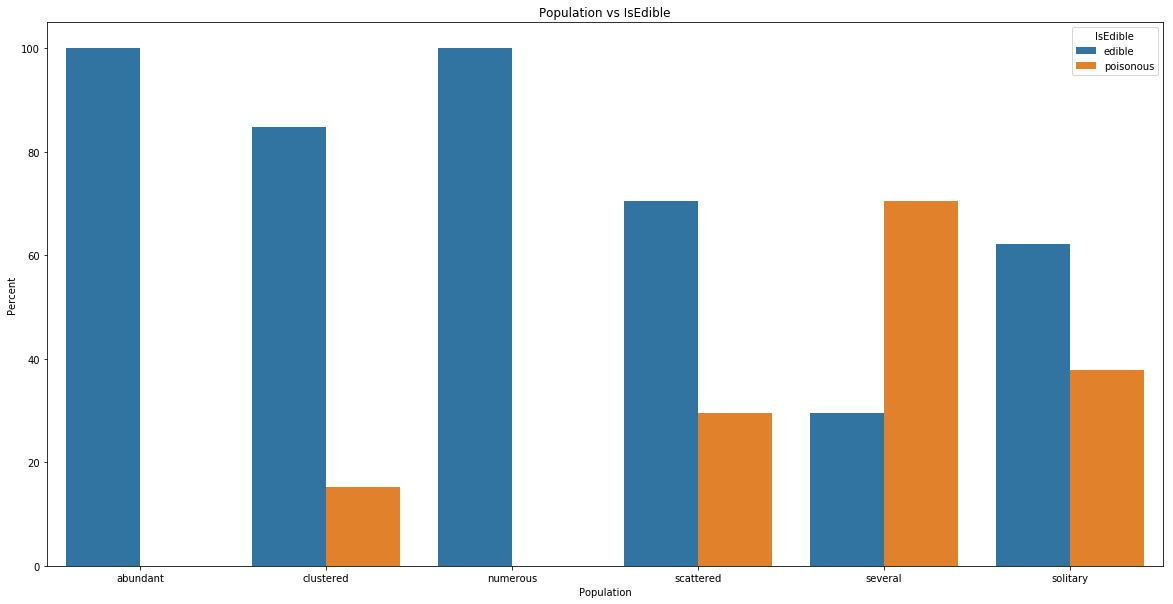

In [39]:
# define a new figure for plotting
plt.figure(figsize=(20,10))

#plots mushroom dataset by population and whether it is edible or not using the percentages
sns.barplot(x='Population',y='Percent',hue='IsEdible',data=pct_edible_pop);

# give the plot a title
plt.title('Population vs IsEdible');

**Findings:** Like odor, the mushroom's population seems also to be a good predictor of whether a mushroom is edible or not. This is because based on the chart above, if the population of the specific mushroom is abundant and numerous, it is highly likely that it is going to be edible. Being in a clustered, scattered, and solitary population category can also tell us that it is more likely edible. However, there is a 37.85% chance that it can be poisonous if categorized as solitary. If the mushroom's population is categorized as several, it is more likely to be poisonous (approximately 71%). 

## Phase 2: Build Predictive Models ##

### A. Steps to Prepare Data for Logistic Regression:###
1. Create a copy of the original subset of the data.
2. Replace IsEdible column values to numerical values. 1 if it is 'edible' and 0 otherwise.
3. Create a set of dummy variables for the 3 predictor variables identified above (cap color, odor, population).

In [40]:
sub_mr2 = sub_mr.copy() #creates copy of the original data subset
sub_mr2.head()

,IsEdible,Cap_Color,Odor,Population
0,poisonous,brown,pungent,scattered
1,edible,yellow,almond,numerous
2,edible,white,anise,numerous
3,poisonous,white,pungent,scattered
4,edible,gray,none,abundant


In [41]:
#replaces IsEdible values to 1 if 'edible' and 0 otherwise
sub_mr2.IsEdible.replace('edible', 1, inplace = True)
sub_mr2.IsEdible.replace('poisonous', 0, inplace = True)
sub_mr2.head()

,IsEdible,Cap_Color,Odor,Population
0,0,brown,pungent,scattered
1,1,yellow,almond,numerous
2,1,white,anise,numerous
3,0,white,pungent,scattered
4,1,gray,none,abundant


In [42]:
#creates new dataframe and creates dummy variables for the predictor variables
sub_mr_dummies = pd.get_dummies(sub_mr2)
sub_mr_dummies.head()

,IsEdible,Cap_Color_brown,Cap_Color_buff,Cap_Color_cinnamon,Cap_Color_gray,Cap_Color_green,Cap_Color_pink,Cap_Color_purple,Cap_Color_red,Cap_Color_white,...,Odor_musty,Odor_none,Odor_pungent,Odor_spicy,Population_abundant,Population_clustered,Population_numerous,Population_scattered,Population_several,Population_solitary
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### B. Logistic Regression Modelling:###

1. Verify that creation of dummy variables was successful by ensuring that there are no null values.
2. Perform logistic regression modelling on different combinations of the variables.
3. Choose the best logistic regression model.
4. Examine the coefficients of each of the predictor (dummy) variables on the chosen logistic regression model.
5. Evaluate model using a validation set.

In [43]:
#Check to see if any null value existed
sub_mr_dummies.isnull().sum()

IsEdible                0
Cap_Color_brown         0
Cap_Color_buff          0
Cap_Color_cinnamon      0
Cap_Color_gray          0
Cap_Color_green         0
Cap_Color_pink          0
Cap_Color_purple        0
Cap_Color_red           0
Cap_Color_white         0
Cap_Color_yellow        0
Odor_almond             0
Odor_anise              0
Odor_creosote           0
Odor_fishy              0
Odor_foul               0
Odor_musty              0
Odor_none               0
Odor_pungent            0
Odor_spicy              0
Population_abundant     0
Population_clustered    0
Population_numerous     0
Population_scattered    0
Population_several      0
Population_solitary     0
dtype: int64

This shows that the dummy variables were created successfully and it does not have any null values.

### Logistic Regression Modelling: ##

#### Model 1: Odor Only #### 
Based on the EDA result above, the odor column is a very good predictor of whether the mushroom is edible or not. For this reason, we decided to do a Logistic model that only uses the odor column as predictor.

In [44]:
# create dataframes with an intercept column
y_odor, X_odor = dmatrices('IsEdible ~ Odor_almond +  Odor_anise +  Odor_creosote +  Odor_fishy +  Odor_foul + Odor_musty \
                            +  Odor_none +  Odor_pungent +  Odor_spicy +  Population_abundant + Population_clustered \
                            + Population_numerous + Population_scattered + Population_several + Population_solitary',sub_mr_dummies, return_type="dataframe")
print (X_odor.columns)

Index(['Intercept', 'Odor_almond', 'Odor_anise', 'Odor_creosote', 'Odor_fishy',
       'Odor_foul', 'Odor_musty', 'Odor_none', 'Odor_pungent', 'Odor_spicy',
       'Population_abundant', 'Population_clustered', 'Population_numerous',
       'Population_scattered', 'Population_several', 'Population_solitary'],
      dtype='object')


In [45]:
# flatten y into a 1-D array
y_odor = np.ravel(y_odor)

In [46]:
# instantiate a logistic regression model, and fit with X and y
model_odor = LogisticRegression()
model_odor = model_odor.fit(X_odor, y_odor)

# check the accuracy on the training set
model_odor.score(X_odor, y_odor)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9852289512555391

**Result:** The result shows us that just using the odor column as predictor variable can actually yield a good model that is 98.52% accurate.

#### Model 2: Odor and Cap Color #### 
In this model, we wanted to see the effect of adding the Cap Color in the logistic regression model. Based on the EDA result above, it seems that Cap Color is not really a good predictor of whether the mushroom is edible or not. By adding this to the model, we will be able to find out if it will increase, decrease, or will have no effect on the accuracy of the model.

In [47]:
# create dataframes with an intercept column
y_occ, X_occ = dmatrices('IsEdible ~ Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon + Cap_Color_gray \
                          + Cap_Color_green + Cap_Color_pink + Cap_Color_purple + Cap_Color_red + Cap_Color_white \
                          + Cap_Color_yellow + Odor_almond +  Odor_anise +  Odor_creosote +  Odor_fishy +  Odor_foul \
                          + Odor_musty +  Odor_none +  Odor_pungent +  Odor_spicy',sub_mr_dummies, return_type="dataframe")
print (X_occ.columns)

Index(['Intercept', 'Cap_Color_brown', 'Cap_Color_buff', 'Cap_Color_cinnamon',
       'Cap_Color_gray', 'Cap_Color_green', 'Cap_Color_pink',
       'Cap_Color_purple', 'Cap_Color_red', 'Cap_Color_white',
       'Cap_Color_yellow', 'Odor_almond', 'Odor_anise', 'Odor_creosote',
       'Odor_fishy', 'Odor_foul', 'Odor_musty', 'Odor_none', 'Odor_pungent',
       'Odor_spicy'],
      dtype='object')


In [48]:
# flatten y into a 1-D array
y_occ = np.ravel(y_occ)

In [49]:
# instantiate a logistic regression model, and fit with X and y
model_occ = LogisticRegression()
model_occ = model_occ.fit(X_occ, y_occ)

# check the accuracy on the training set
model_occ.score(X_occ, y_occ)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9852289512555391

**Result:** The result above shows that adding cap color to the original model does not increase or decrease the accuracy of the original model. This just shows that adding adding cap color alone will not improve the model to predict whether a mushroom is edible or not.

In [50]:
# create dataframes with an intercept column
y_op, X_op = dmatrices('IsEdible ~ Odor_almond +  Odor_anise +  Odor_creosote +  Odor_fishy +  Odor_foul + Odor_musty \
                        +  Odor_none +  Odor_pungent +  Odor_spicy +  Population_abundant + Population_clustered \
                        + Population_numerous + Population_scattered + Population_several + Population_solitary',sub_mr_dummies, return_type="dataframe")
print (X_op.columns)

Index(['Intercept', 'Odor_almond', 'Odor_anise', 'Odor_creosote', 'Odor_fishy',
       'Odor_foul', 'Odor_musty', 'Odor_none', 'Odor_pungent', 'Odor_spicy',
       'Population_abundant', 'Population_clustered', 'Population_numerous',
       'Population_scattered', 'Population_several', 'Population_solitary'],
      dtype='object')


In [51]:
# flatten y into a 1-D array
y_op = np.ravel(y_op)

In [52]:
# instantiate a logistic regression model, and fit with X and y
model_op = LogisticRegression()
model_op = model_op.fit(X_op, y_op)

# check the accuracy on the training set
model_op.score(X_op, y_op)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9852289512555391

**Result:** The result above shows that adding population to the original model (odor only) does not increase or decrease the accuracy of the model. This just shows that adding adding population alone will not improve the model to predict whether a mushroom is edible or not.

#### Model 4: Cap color and Population #### 
In this model, we wanted to see the effect of combining the cap color and population only in the logistic regression model. With this model, we will see the effect of removing the odor.

In [53]:
# create dataframes with an intercept column
y_cp, X_cp = dmatrices('IsEdible ~ Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon + Cap_Color_gray + Cap_Color_green \
                  + Cap_Color_pink + Cap_Color_purple + Cap_Color_red + Cap_Color_white + Cap_Color_yellow + Population_abundant + Population_clustered + Population_numerous + Population_scattered \
                  + Population_several + Population_solitary',sub_mr_dummies, return_type="dataframe")
print (X_cp.columns)

Index(['Intercept', 'Cap_Color_brown', 'Cap_Color_buff', 'Cap_Color_cinnamon',
       'Cap_Color_gray', 'Cap_Color_green', 'Cap_Color_pink',
       'Cap_Color_purple', 'Cap_Color_red', 'Cap_Color_white',
       'Cap_Color_yellow', 'Population_abundant', 'Population_clustered',
       'Population_numerous', 'Population_scattered', 'Population_several',
       'Population_solitary'],
      dtype='object')


In [54]:
# flatten y into a 1-D array
y_cp = np.ravel(y_cp)

In [55]:
# instantiate a logistic regression model, and fit with X and y
model_cp = LogisticRegression()
model_cp = model_cp.fit(X_cp, y_cp)

# check the accuracy on the training set
model_cp.score(X_cp, y_cp)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7705563761693747

**Result:** The result above shows that removing odor in the model and just using the combination of cap color and population will decrease the accuracy of the model by approximately 22%. This shows that odor is the most important predictor of whether a mushroom is edible or not.

#### Model 5: Odor, Cap color and Population #### 
In this model, we wanted to see the effect of combining the odor, cap color and population in the logistic regression model. 

In [56]:
# create dataframes with an intercept column
y, X = dmatrices('IsEdible ~ Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon + Cap_Color_gray + Cap_Color_green \
                  + Cap_Color_pink + Cap_Color_purple + Cap_Color_red + Cap_Color_white + Cap_Color_yellow + Odor_almond \
                  +  Odor_anise +  Odor_creosote +  Odor_fishy +  Odor_foul + Odor_musty +  Odor_none +  Odor_pungent \
                  +  Odor_spicy +  Population_abundant + Population_clustered + Population_numerous + Population_scattered \
                  + Population_several + Population_solitary',sub_mr_dummies, return_type="dataframe")
print (X.columns)

Index(['Intercept', 'Cap_Color_brown', 'Cap_Color_buff', 'Cap_Color_cinnamon',
       'Cap_Color_gray', 'Cap_Color_green', 'Cap_Color_pink',
       'Cap_Color_purple', 'Cap_Color_red', 'Cap_Color_white',
       'Cap_Color_yellow', 'Odor_almond', 'Odor_anise', 'Odor_creosote',
       'Odor_fishy', 'Odor_foul', 'Odor_musty', 'Odor_none', 'Odor_pungent',
       'Odor_spicy', 'Population_abundant', 'Population_clustered',
       'Population_numerous', 'Population_scattered', 'Population_several',
       'Population_solitary'],
      dtype='object')


In [57]:
# flatten y into a 1-D array
y = np.ravel(y)

In [58]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9926144756277696

**Result:** The model we have generated has an accuracy score of 99.26%. It appears that the combination of the three predictors we have chosen will yield the best model and appears to be useful. As such, we recommend the use of this model and will use this to analyze the coefficients and will also further evaluate this model as shown in the next steps.

In [59]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[-0.4383920971625683]
1,Cap_Color_brown,[1.2838526408683053]
2,Cap_Color_buff,[-2.101245071697774]
3,Cap_Color_cinnamon,[1.0858392940509358]
4,Cap_Color_gray,[1.8030935959956604]
5,Cap_Color_green,[0.6827945736154263]
6,Cap_Color_pink,[-1.9153380545037386]
7,Cap_Color_purple,[0.6827945736154263]
8,Cap_Color_red,[1.975393226927675]
9,Cap_Color_white,[-1.6519166828029979]


**Findings:** Based on the results of the coefficients above, the cap colors: **buff, pink, white, yellow** decreases the chance of the mushroom becoming edible. Among these colors, it is quite surprising to note that white decreases the chance of the mushroom being edible when the distribution of the cap colors (from the EDA) shows that this color has a higher chance of being edible. When it comes to odor, the following smells **creosote, fishy, foul, musty, pungent, spicy** decreases the chance of the mushroom being edible which is also consistent with the results of the EDA in Phase 1. Lastly, and population **clustered, several, solitary** also decreases the chance that the mushroom is edible. The result is also quite surprising since from the EDA, it seems like being categorized in the clustered population means that the mushroom is more likely to be edible. In addition, the coefficient for clustered population seems to decrease the chance of the mushroom being edible as compared with it being solitary when on the EDA, it showed that being categorized in the solitary category increases the chances of it being poisonous than when it is clustered.

### Model Evaluation Using a Validation Set ###

In [60]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print (predicted)

[0. 1. 1. ... 0. 0. 0.]


In [62]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs)

[[0.94143031 0.05856969]
 [0.00263644 0.99736356]
 [0.00484673 0.99515327]
 ...
 [0.99881133 0.00118867]
 [0.99076453 0.00923547]
 [0.99061817 0.00938183]]


In [63]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.9938474159146842
0.999535111708038


**Result:** The accuracy is 99%, which is the same as we experienced when training and predicting on the same data.

**Generating the confusion matrix and classification report with other metrics:**

In [64]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[1154   12]
 [   3 1269]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1166
         1.0       0.99      1.00      0.99      1272

   micro avg       0.99      0.99      0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



**Findings:** Based on the statistics we generated above, the weighted average of the precision and recall is 99% - which means our result showed F1 score almost reaches its best value at 1 - it's a very strong valuable model

## Conclusion and Recommendation: ##

Based on the EDA and logistic regression results, we conclude that odor is the best predictor of whether a mushroom is edible or not. Odor alone can create a logistic regression model that is 98.52% accurate. Adding the two other predictors (cap color and population) only increased the accuracy by approximately 0.7% which is barely relevant. According to the results, if we want to make a scientific prediction, then we can choose the one that has the higher accuracy, that is, using the 3 variables (odor, cap color, and population) to predict whether the mushroom is edible or not. However, if we just want to use a model for personal use (e.g., we are lost in a forest where there are a lot of mushrooms and that is all we can eat), we can just use the smell to predict whether we can eat it or not and we will have a 98% chance of survival.

We further recommend though to use other physical attributes of the mushroom to find out which combinations will yield almost the same accuracy. This is because sometimes a person may have problems with their sense of smell and it will be hard to determine the smell of the mushroom and the prediction may be incorrect because of this. The physical characteristics of the mushroom may also be useful in this sense.